In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
from datasets import load_dataset

dataset = load_dataset("go_emotions", "raw")

raw/train-00000-of-00001.parquet:   0%|          | 0.00/24.8M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/211225 [00:00<?, ? examples/s]

In [9]:
train_df = dataset['train'].to_pandas()

In [10]:
train_df.head()

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,1.548381e+09,1,False,0,...,0,0,0,0,0,0,0,1,0,0
1,>sexuality shouldn’t be a grouping category I...,eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,1.548084e+09,37,False,0,...,0,0,0,0,0,0,0,0,0,0
2,"You do right, if you don't care then fuck 'em!",ed2mah1,Labalool,confessions,t3_abru74,t1_ed2m7g7,1.546428e+09,37,False,0,...,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,1.547965e+09,18,False,0,...,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",eda6yn6,American_Fascist713,starwarsspeculation,t3_ackt2f,t1_eda65q2,1.546669e+09,2,False,0,...,0,0,0,0,0,0,0,0,0,1


<Axes: >

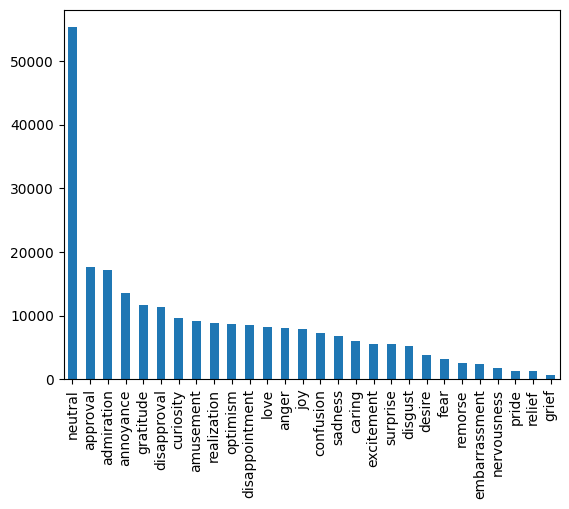

In [11]:
emotion_cols = train_df.columns[9:]

emotion_counts = train_df[emotion_cols].sum().sort_values(ascending=False)

emotion_counts.plot(kind='bar')

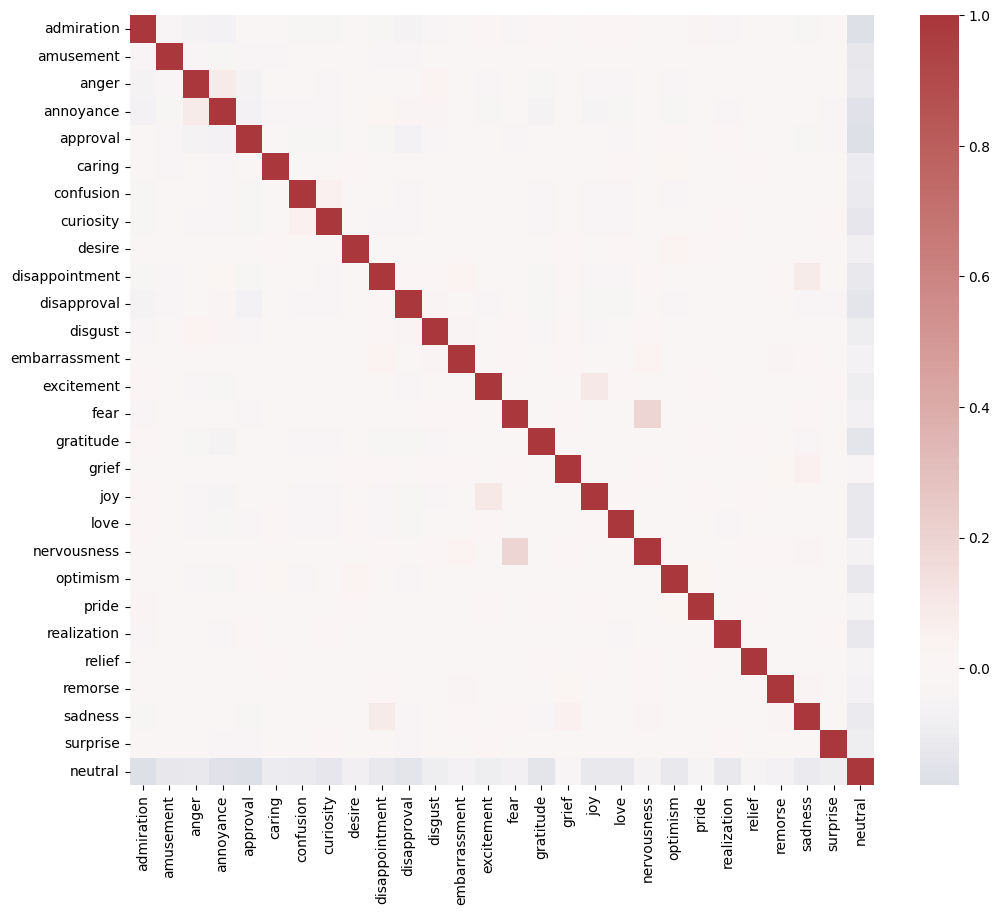

In [19]:
corr = train_df[emotion_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, center=0, cmap='vlag')
plt.show()

<Axes: >

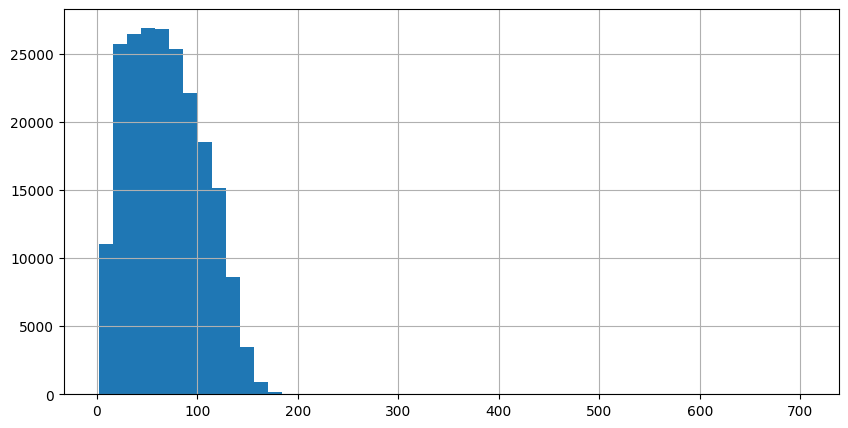

In [21]:
train_df['text_len'] = train_df['text'].apply(len)
train_df['text_len'].hist(bins=50, figsize=(10, 5))

<Axes: >

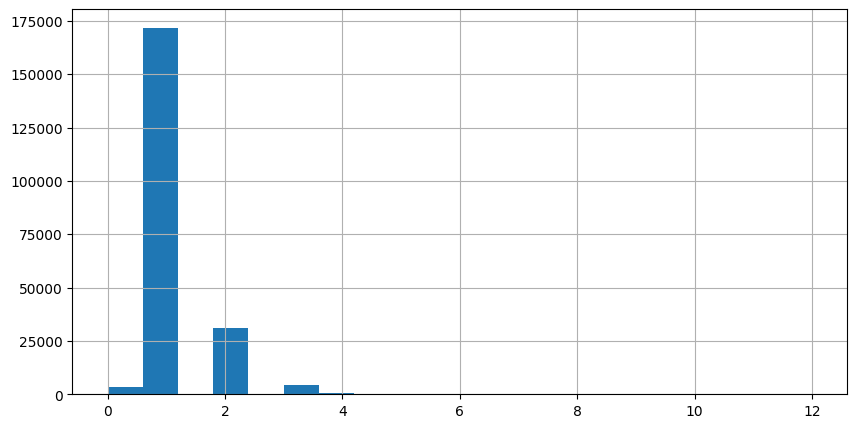

In [22]:
train_df['num_labels'] = train_df[emotion_cols].sum(axis=1)
train_df['num_labels'].hist(bins=20, figsize=(10, 5))